## Loading Data and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_excel('Online Retail.xlsx')
except FileNotFoundError:
    print("The 'Online Retail.xlsx' file was not found. Please make sure it's in the same directory.")
    exit()

print("Data loaded successfully.")
print("\nInitial data information:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Data loaded successfully.

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B   

## Data Cleaning and Preprocessing

In [2]:
# Remove rows where CustomerID is null
df.dropna(subset=['CustomerID'], inplace=True)
print(f"\nDataFrame shape after removing missing CustomerID: {df.shape}")


DataFrame shape after removing missing CustomerID: (406829, 8)


In [3]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [4]:
# Remove canceled orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f"DataFrame shape after removing canceled orders: {df.shape}")

# Remove rows with negative Quantity
df = df[df['Quantity'] > 0]
print(f"DataFrame shape after removing negative quantities: {df.shape}")

DataFrame shape after removing canceled orders: (397924, 8)
DataFrame shape after removing negative quantities: (397924, 8)


In [ ]:
## Create a new column 'Sales'
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [6]:
## Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")

DataFrame shape after removing duplicates: (392732, 9)


In [8]:
## Save the cleaned data to a new CSV file
df.to_csv('cleaned_sales_data.csv', index=False)

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_sales_data.csv' exists from the previous steps
try:
    df = pd.read_csv('cleaned_sales_data.csv')
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
except FileNotFoundError:
    print("Cleaned data file not found. Please run the previous data cleaning steps first.")
    exit()

# 1. Calculate Overall KPIs
print("--- Overall Key Performance Indicators ---")
total_sales = df['Sales'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()
average_order_value = total_sales / total_orders

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value (AOV): ${average_order_value:,.2f}\n")

# 2. Analyze Sales Trends
# Monthly Sales
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceYearMonth')['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)



--- Overall Key Performance Indicators ---
Total Sales: $8,887,208.89
Total Orders: 18,536
Total Customers: 4,339
Average Order Value (AOV): $479.46



In [3]:
# 2. Analyze Sales Trends
# Monthly Sales
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceYearMonth')['Sales'].sum()
monthly_sales.index = monthly_sales.index.astype(str)

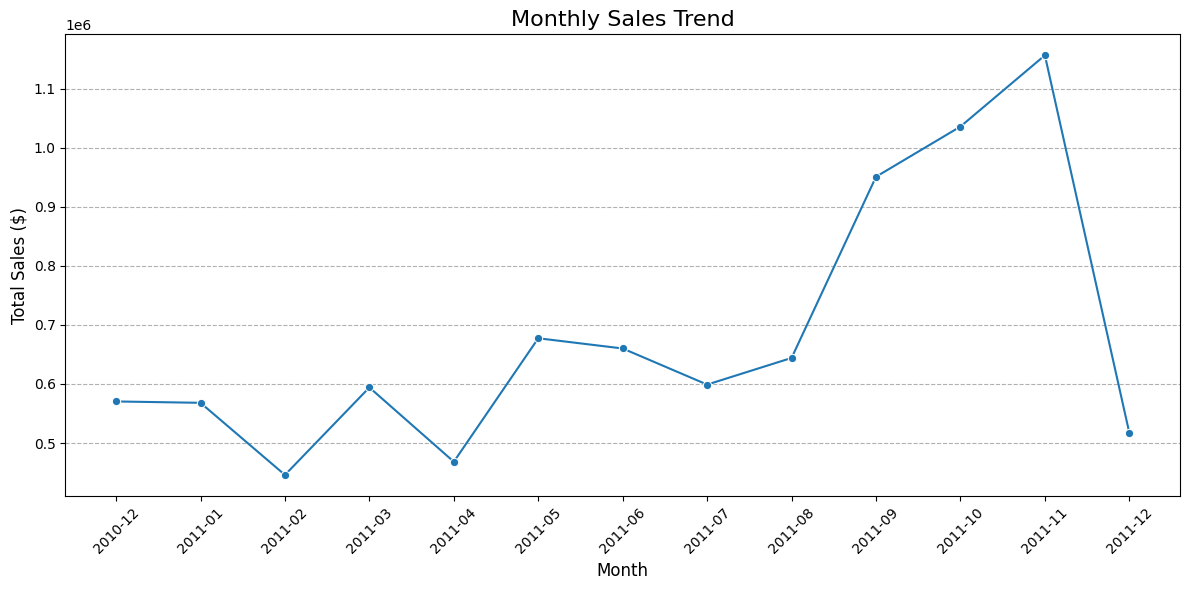

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

/var/folders/90/3mvx3ts92nsd32k5y3g748qc0000gn/T/ipykernel_8563/994819154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, palette='viridis')


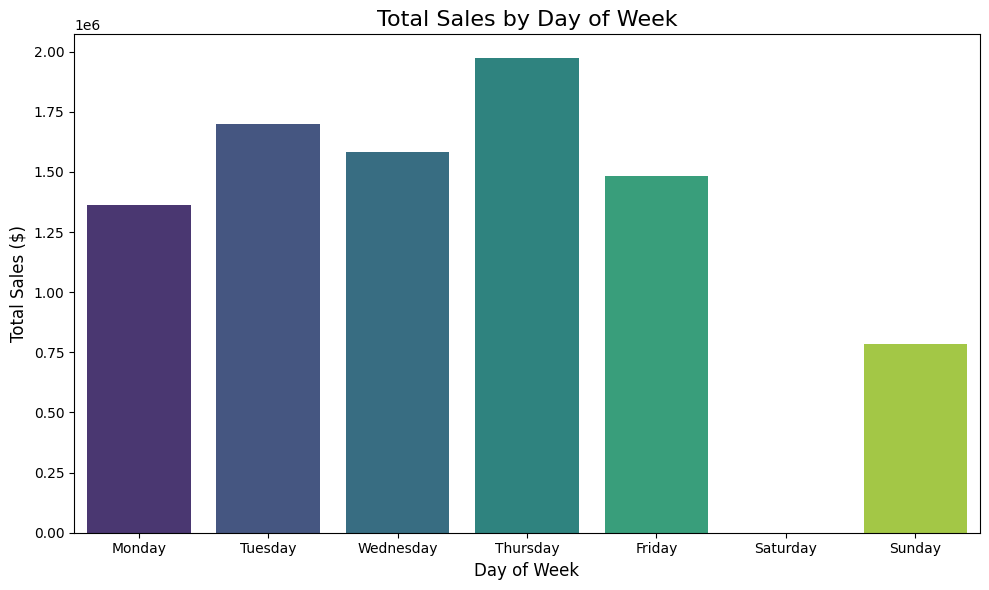

In [5]:
# Day of Week Sales
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
day_of_week_sales = df.groupby('DayOfWeek')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, palette='viridis')
plt.title('Total Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
# 3. Top Products and Customers
# Top 10 Best-Selling Products by Quantity
top_products_qty = df.groupby('Description')['Quantity'].sum().nlargest(10)
print("--- Top 10 Best-Selling Products (by Quantity) ---")
print(top_products_qty)

--- Top 10 Best-Selling Products (by Quantity) ---
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [7]:
# Top 10 Most Profitable Customers (by Sales)
top_customers_sales = df.groupby('CustomerID')['Sales'].sum().nlargest(10)
print("\n--- Top 10 Most Profitable Customers (by Sales) ---")
print(top_customers_sales)


--- Top 10 Most Profitable Customers (by Sales) ---
CustomerID
14646    280206.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    143711.17
12415    124914.53
14156    117210.08
17511     91062.38
16029     80850.84
12346     77183.60
Name: Sales, dtype: float64


/var/folders/90/3mvx3ts92nsd32k5y3g748qc0000gn/T/ipykernel_8563/2145276192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='crest')


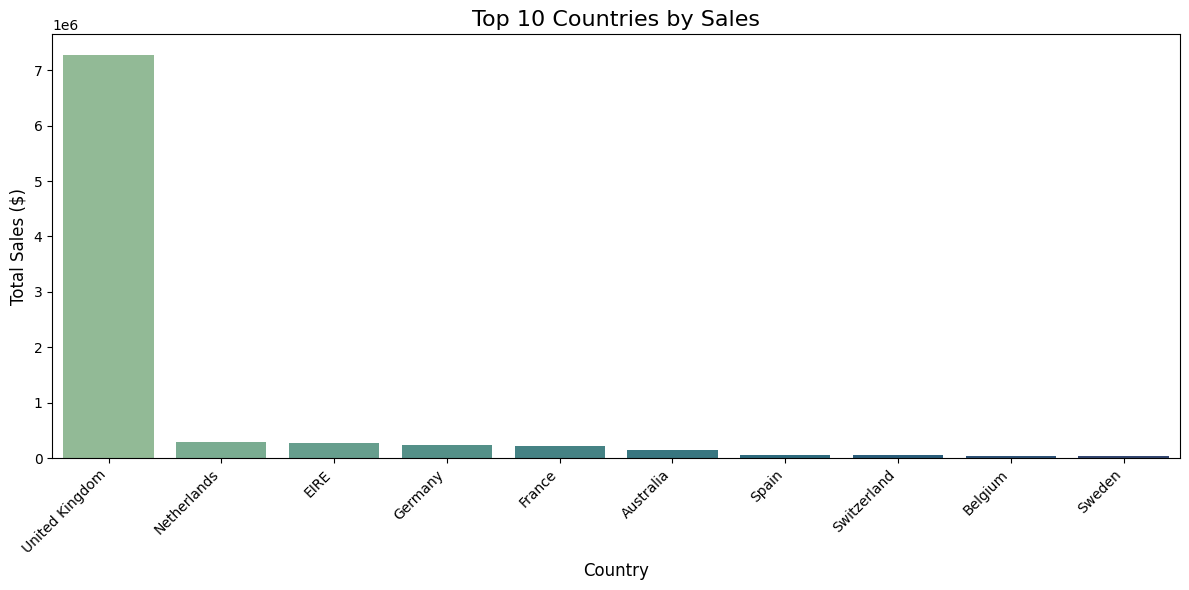

In [8]:
# 4. Geographical Analysis
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette='crest')
plt.title('Top 10 Countries by Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Advanced Analysis (RFM)

In [10]:
# Calculate RFM values
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

print("--- RFM DataFrame Head ---")
print(rfm_df.head())

rfm_df.to_csv('rfm_df.csv', index=False)
print("RFM data saved to 'rfm_df.csv'.")

--- RFM DataFrame Head ---
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40
RFM data saved to 'rfm_df.csv'.


## Customer Segmentation and Visualization

In [ ]:

try:
    rfm_df = pd.read_csv('rfm_df.csv')
except FileNotFoundError:
    print("RFM data file not found. Please run the previous steps to generate it.")
    exit()


try:
    rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 3, labels=[1, 2, 3], duplicates='drop').astype(str)
    print("Frequency scores assigned using 3 quantiles.")
except ValueError:
    print("Could not create 3 quantiles for Frequency. Trying manual bins.")
    

    bins = [0, 1, 2, 5, rfm_df['Frequency'].max()]
    labels = [1, 2, 3, 4]
    rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=bins, labels=labels, right=False).astype(str)
    print("Frequency scores assigned using manual bins.")
    

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1]).astype(str)


monetary_bins = [0, 100, 500, 1500, rfm_df['Monetary'].max()]
monetary_labels = [1, 2, 3, 4]
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'], bins=monetary_bins, labels=monetary_labels, right=False).astype(str)

rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']

print("\n--- Corrected RFM Scores DataFrame ---")
print(rfm_df.head())

Could not create 3 quantiles for Frequency. Trying manual bins.
Frequency scores assigned using manual bins.

--- Corrected RFM Scores DataFrame ---
   CustomerID  Recency  Frequency  Monetary F_Score R_Score M_Score RFM_Score
0       12346      326          1  77183.60       2       1       4       124
1       12347        2          7   4310.00       4       4       4       444
2       12348       75          4   1797.24       3       2       4       234
3       12349       19          1   1757.55       2       3       4       324
4       12350      310          1    334.40       2       1       2       122


In [18]:
# 2. Define Customer Segments
# A function to categorize customers based on their RFM score
def rfm_segment(row):
    # Champions: Best customers, bought recently, often, and spend the most
    if row['RFM_Score'] == '444':
        return 'Champions'
    # Loyal Customers: High frequency and monetary scores
    if row['RFM_Score'].startswith('4') and row['F_Score'] in ['3', '4']:
        return 'Loyal'
    # At-Risk: Spent a lot but haven't bought recently
    if row['RFM_Score'].startswith('1') and row['M_Score'] in ['3', '4']:
        return 'At-Risk'
    # New Customers: Bought recently but infrequently
    if row['RFM_Score'].startswith('4') and row['F_Score'] == '1':
        return 'New Customers'
    # Potential Loyalist: Good recency and frequency
    if row['RFM_Score'].startswith('3') and row['F_Score'] in ['3', '4']:
        return 'Potential Loyalist'
    # Others
    return 'Others'

rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)

print("\n--- Customer Segments Head ---")
print(rfm_df.head())


--- Customer Segments Head ---
   CustomerID  Recency  Frequency  Monetary F_Score R_Score M_Score RFM_Score  \
0       12346      326          1  77183.60       2       1       4       124   
1       12347        2          7   4310.00       4       4       4       444   
2       12348       75          4   1797.24       3       2       4       234   
3       12349       19          1   1757.55       2       3       4       324   
4       12350      310          1    334.40       2       1       2       122   

  RFM_Segment  
0     At-Risk  
1   Champions  
2      Others  
3      Others  
4      Others  



--- Customer Segment Distribution ---
RFM_Segment
Others                2211
Potential Loyalist     799
Champions              522
Loyal                  499
At-Risk                308
Name: count, dtype: int64


/var/folders/90/3mvx3ts92nsd32k5y3g748qc0000gn/T/ipykernel_8563/3953918624.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


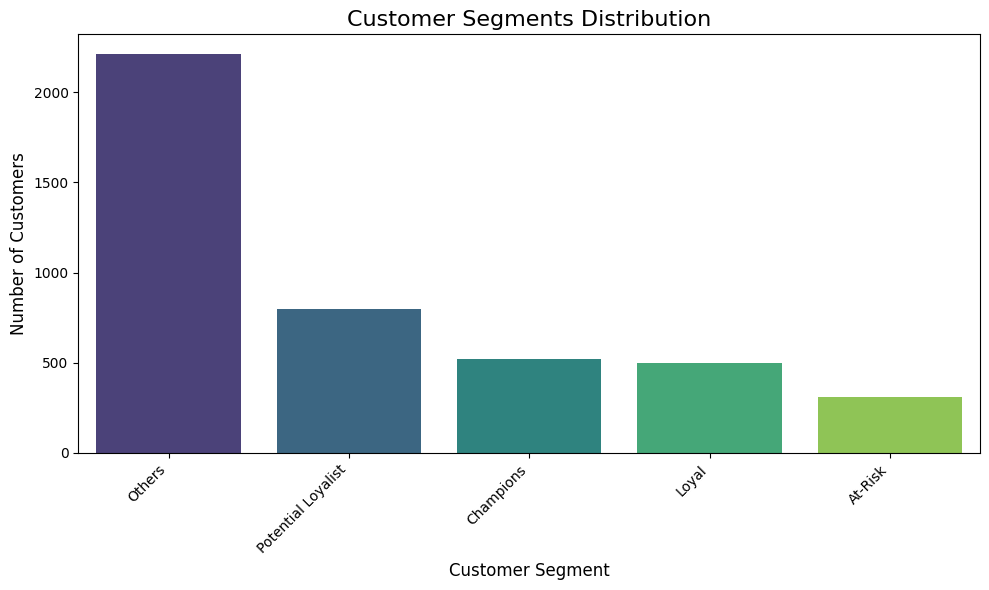

In [19]:
# 3. Visualize the distribution of the segments
segment_counts = rfm_df['RFM_Segment'].value_counts()
print("\n--- Customer Segment Distribution ---")
print(segment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the final DataFrame with segments
rfm_df.to_csv('rfm_with_segments.csv', index=False)

# Analysis

## Executive Summary

Based on an analysis of our sales data, we've identified key customer segments and significant seasonal trends. Our 'Champions' and 'Loyal' segments, while smaller in number, are our most valuable customers, contributing a substantial portion of revenue. A large group of customers, however, falls into the 'Others' and 'At-Risk' categories, representing a significant opportunity for re-engagement. Our sales also exhibit strong seasonality, peaking during the last quarter of the year. To maximize profitability, we recommend focusing on retaining our top-tier customers and re-engaging those who are at risk.


## Key Findings

Customer Segmentation: We've successfully segmented our customer base into five distinct groups based on their purchasing behavior. The largest segment is 'Others' (2,211 customers), which includes various low-value and new customers. The most valuable segments are 'Champions' (522 customers) and 'Loyal' (499 customers). * Champions and Loyal Customers Drive Revenue: Our analysis confirms that the 'Champions' and 'Loyal' customer segments, despite their smaller size, have the highest frequency and monetary values. They are the core of our business and are crucial for future growth.

Significant 'At-Risk' Segment: The 'At-Risk' segment comprises 308 customers who have not made a recent purchase. These customers have a history of spending but are at risk of churning, representing a critical target for re-engagement efforts.
